## __Data Selection__
You need to get the data that you will use for the index. This could be done by using<br>
publicly available data sets or survey.<br>
(10 Marks)

In [186]:
import pandas as pd

file_path = 'Sleep_health_and_lifestyle_dataset.csv'
data = pd.read_csv(file_path)
data.head()

,Person ID,Gender,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Blood Pressure,Heart Rate,Daily Steps,Sleep Disorder
0,1,Male,27,Software Engineer,6.1,6,42,6,Overweight,126/83,77,4200,NaN
1,2,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,NaN
2,3,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,NaN
3,4,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea
4,5,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea


In [187]:
# Drop Person ID column
data.drop('Person ID', axis=1, inplace=True)
data.head()

,Gender,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Blood Pressure,Heart Rate,Daily Steps,Sleep Disorder
0,Male,27,Software Engineer,6.1,6,42,6,Overweight,126/83,77,4200,NaN
1,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,NaN
2,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,NaN
3,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea
4,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea


In [188]:
# Print column names
data.columns

Index(['Gender', 'Age', 'Occupation', 'Sleep Duration', 'Quality of Sleep',
       'Physical Activity Level', 'Stress Level', 'BMI Category',
       'Blood Pressure', 'Heart Rate', 'Daily Steps', 'Sleep Disorder'],
      dtype='object')

In [189]:
# Print shape of data
data.shape

(374, 12)

In [190]:
# Describe the data
data.describe()

,Age,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,Heart Rate,Daily Steps
count,374.000000,374.000000,374.000000,374.000000,374.000000,374.000000,374.000000
mean,42.184492,7.132086,7.312834,59.171123,5.385027,70.165775,6816.844920
std,8.673133,0.795657,1.196956,20.830804,1.774526,4.135676,1617.915679
min,27.000000,5.800000,4.000000,30.000000,3.000000,65.000000,3000.000000
25%,35.250000,6.400000,6.000000,45.000000,4.000000,68.000000,5600.000000
50%,43.000000,7.200000,7.000000,60.000000,5.000000,70.000000,7000.000000
75%,50.000000,7.800000,8.000000,75.000000,7.000000,72.000000,8000.000000
max,59.000000,8.500000,9.000000,90.000000,8.000000,86.000000,10000.000000


## __Imputation of Missing Data__
If your data is not complete you will need to infer values to complete the dataset.<br>
(10 Marks)

In [191]:
# Check for missing values
missing_data = data.isnull().sum()
missing_data

Gender                       0
Age                          0
Occupation                   0
Sleep Duration               0
Quality of Sleep             0
Physical Activity Level      0
Stress Level                 0
BMI Category                 0
Blood Pressure               0
Heart Rate                   0
Daily Steps                  0
Sleep Disorder             219
dtype: int64

In [192]:
# Impute missing values with 'None' for people with no sleep disorder
data.fillna({'Sleep Disorder': 'None'}, inplace=True)
print(data.isnull().sum())

Gender                     0
Age                        0
Occupation                 0
Sleep Duration             0
Quality of Sleep           0
Physical Activity Level    0
Stress Level               0
BMI Category               0
Blood Pressure             0
Heart Rate                 0
Daily Steps                0
Sleep Disorder             0
dtype: int64


__One Hot Encode__

In [193]:
# Identify Categorical columns
categorical_columns = data.select_dtypes(include='object').columns
categorical_columns

Index(['Gender', 'Occupation', 'BMI Category', 'Blood Pressure',
       'Sleep Disorder'],
      dtype='object')

In [194]:
# Add categorical columns to a list
categorical_columns = ['Gender', 'Occupation', 'BMI Category', 'Blood Pressure', 'Sleep Disorder']

In [195]:
# Initialise OneHotEncoder
from sklearn.preprocessing import OneHotEncoder

encoder = OneHotEncoder(sparse_output=False, drop='first')

In [196]:
# Fit and transform the data
encoded_data = encoder.fit_transform(data[categorical_columns])

In [197]:
# Convert the encoded data to a DataFrame
encoded_df = pd.DataFrame(encoded_data, columns=encoder.get_feature_names_out(categorical_columns))

In [198]:
# Reset the index of the original data
data.reset_index(drop=True, inplace=True)
encoded_df.reset_index(drop=True, inplace=True)

In [199]:
# Drop the original categorical columns from the original data
data.drop(categorical_columns, axis=1, inplace=True)

In [200]:
# Concatenate the original data with the encoded data
final_data = pd.concat([data, encoded_df], axis=1)

In [201]:
# Print the final data
final_data.head()

,Age,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,Heart Rate,Daily Steps,Gender_Male,Occupation_Doctor,Occupation_Engineer,...,Blood Pressure_131/86,Blood Pressure_132/87,Blood Pressure_135/88,Blood Pressure_135/90,Blood Pressure_139/91,Blood Pressure_140/90,Blood Pressure_140/95,Blood Pressure_142/92,Sleep Disorder_None,Sleep Disorder_Sleep Apnea
0,27,6.1,6,42,6,77,4200,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,28,6.2,6,60,8,75,10000,1.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,28,6.2,6,60,8,75,10000,1.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,28,5.9,4,30,8,85,3000,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
4,28,5.9,4,30,8,85,3000,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0


## __Multivariate Analysis__
Analyse and report on the structure of the data. Decide what are the most important<br>
variables and what should be excluded from the index.<br>
(10 Marks)


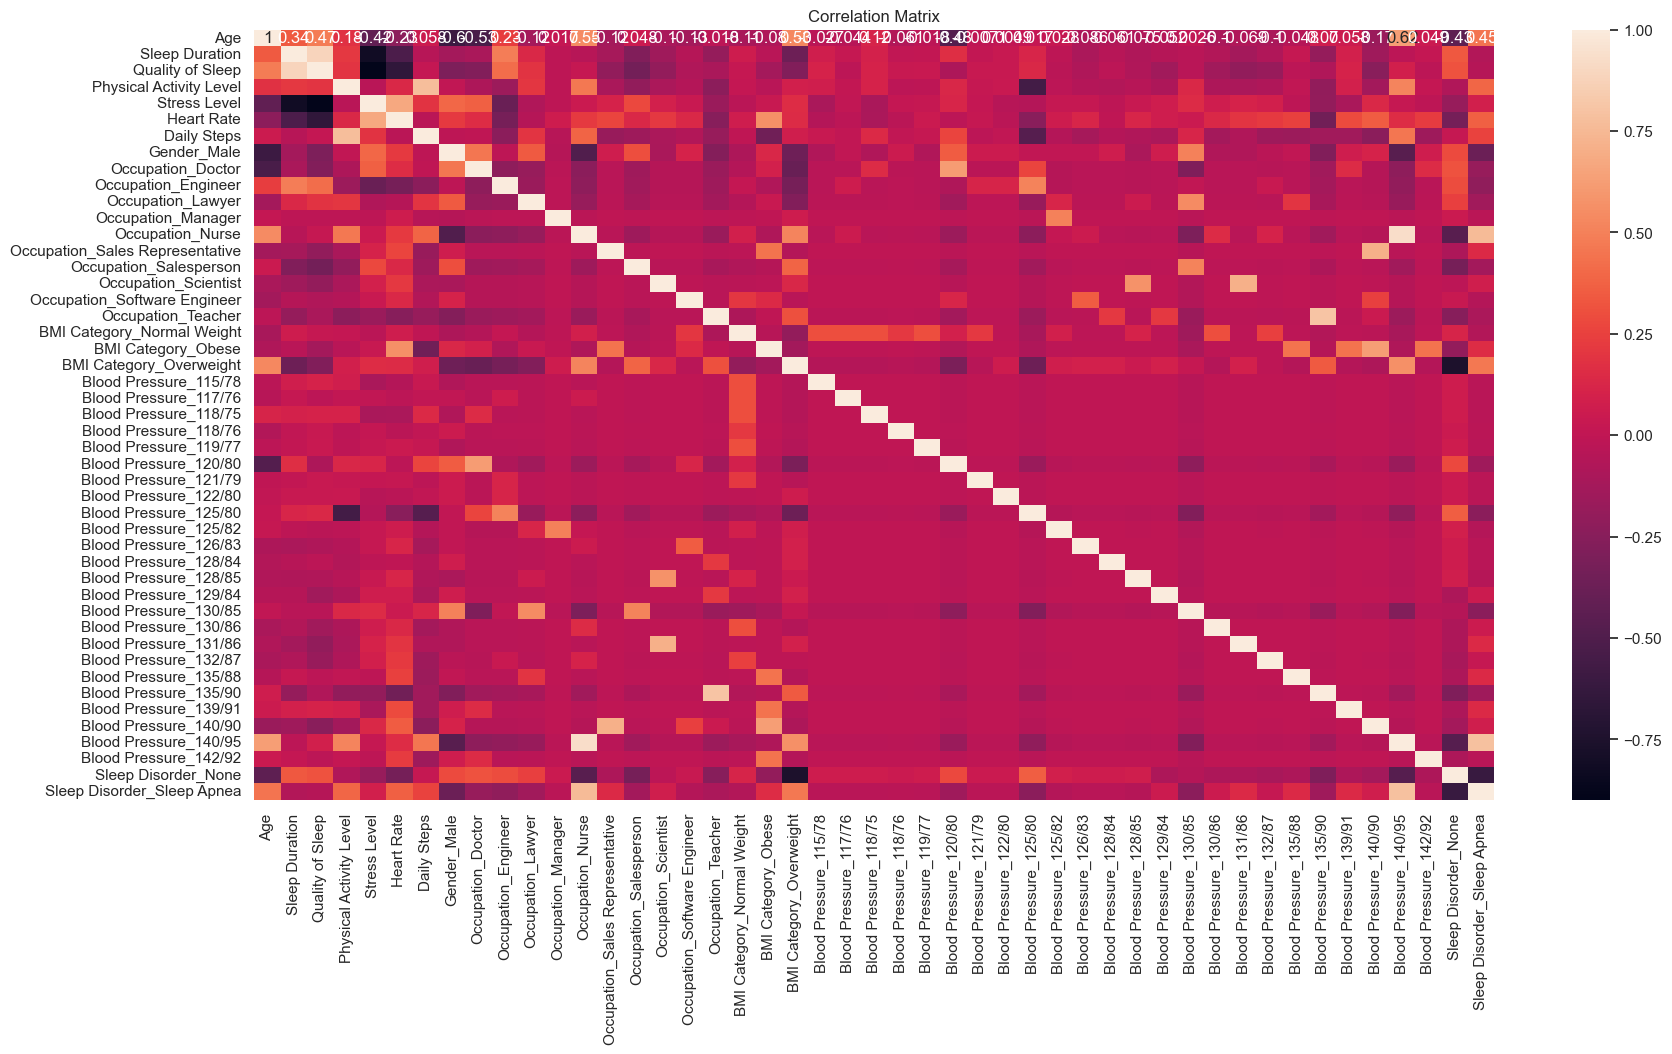

In [213]:
# Correlation matrix
import seaborn as sns
import matplotlib.pyplot as plt

corr = final_data.corr()
sns.heatmap(corr, annot=True)
plt.title("Correlation Matrix")
plt.show()


In [203]:
# Pearson correlation
from scipy.stats import pearsonr

corr = pearsonr(final_data['Age'], final_data['Sleep Duration'])
print(corr)

PearsonRResult(statistic=0.34470935816474374, pvalue=7.117139531216081e-12)


In [204]:
# PCA Analysis Imports
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

In [205]:
# Standardize the data
scaler = StandardScaler()
scaled_data = scaler.fit_transform(final_data)
scaled_data

array([[-1.75309569, -1.29888693, -1.09828011, ..., -0.07332356,
         0.84128625, -0.51333567],
       [-1.63764266, -1.17303623, -1.09828011, ..., -0.07332356,
         0.84128625, -0.51333567],
       [-1.63764266, -1.17303623, -1.09828011, ..., -0.07332356,
         0.84128625, -0.51333567],
       ...,
       [ 1.94140144,  1.21812712,  1.41143533, ..., -0.07332356,
        -1.18865606,  1.94804307],
       [ 1.94140144,  1.21812712,  1.41143533, ..., -0.07332356,
        -1.18865606,  1.94804307],
       [ 1.94140144,  1.21812712,  1.41143533, ..., -0.07332356,
        -1.18865606,  1.94804307]])

In [206]:
# Fit the PCA and keep components that explain 95% of the variance
import numpy as np

pca = PCA(n_components=0.95)
pca_data = pca.fit_transform(scaled_data)
per_var = np.round(pca.explained_variance_ratio_*100, decimals=1)
per_var
pca_data

array([[-1.08770406e+00,  3.72087988e+00,  1.18665430e+00, ...,
         2.81378672e+00,  6.52681238e-01,  2.14924576e-01],
       [-1.76667817e+00,  2.39946021e+00, -1.43565373e+00, ...,
        -6.92397220e-01,  7.16501657e-01, -2.85368088e-03],
       [-1.76667817e+00,  2.39946021e+00, -1.43565373e+00, ...,
        -6.92397220e-01,  7.16501657e-01, -2.85368088e-03],
       ...,
       [ 4.07926565e+00, -2.72859972e+00, -4.34311697e-01, ...,
         2.75508429e-01, -1.06699212e+00, -3.61854566e-01],
       [ 4.07926565e+00, -2.72859972e+00, -4.34311697e-01, ...,
         2.75508429e-01, -1.06699212e+00, -3.61854566e-01],
       [ 4.07926565e+00, -2.72859972e+00, -4.34311697e-01, ...,
         2.75508429e-01, -1.06699212e+00, -3.61854566e-01]])

In [207]:
# Explained variance ratio
explained_variance_ratio = pca.explained_variance_ratio_
explained_variance_ratio

array([0.11071134, 0.0998778 , 0.06861616, 0.05914464, 0.05190476,
       0.04416381, 0.04123592, 0.03859321, 0.0328184 , 0.03169826,
       0.02887592, 0.02681773, 0.02397457, 0.02252321, 0.02229444,
       0.02201313, 0.02175424, 0.0216823 , 0.02149642, 0.02144808,
       0.02143604, 0.02139459, 0.02138463, 0.02095087, 0.01992807,
       0.01484467, 0.01350378, 0.01087441])

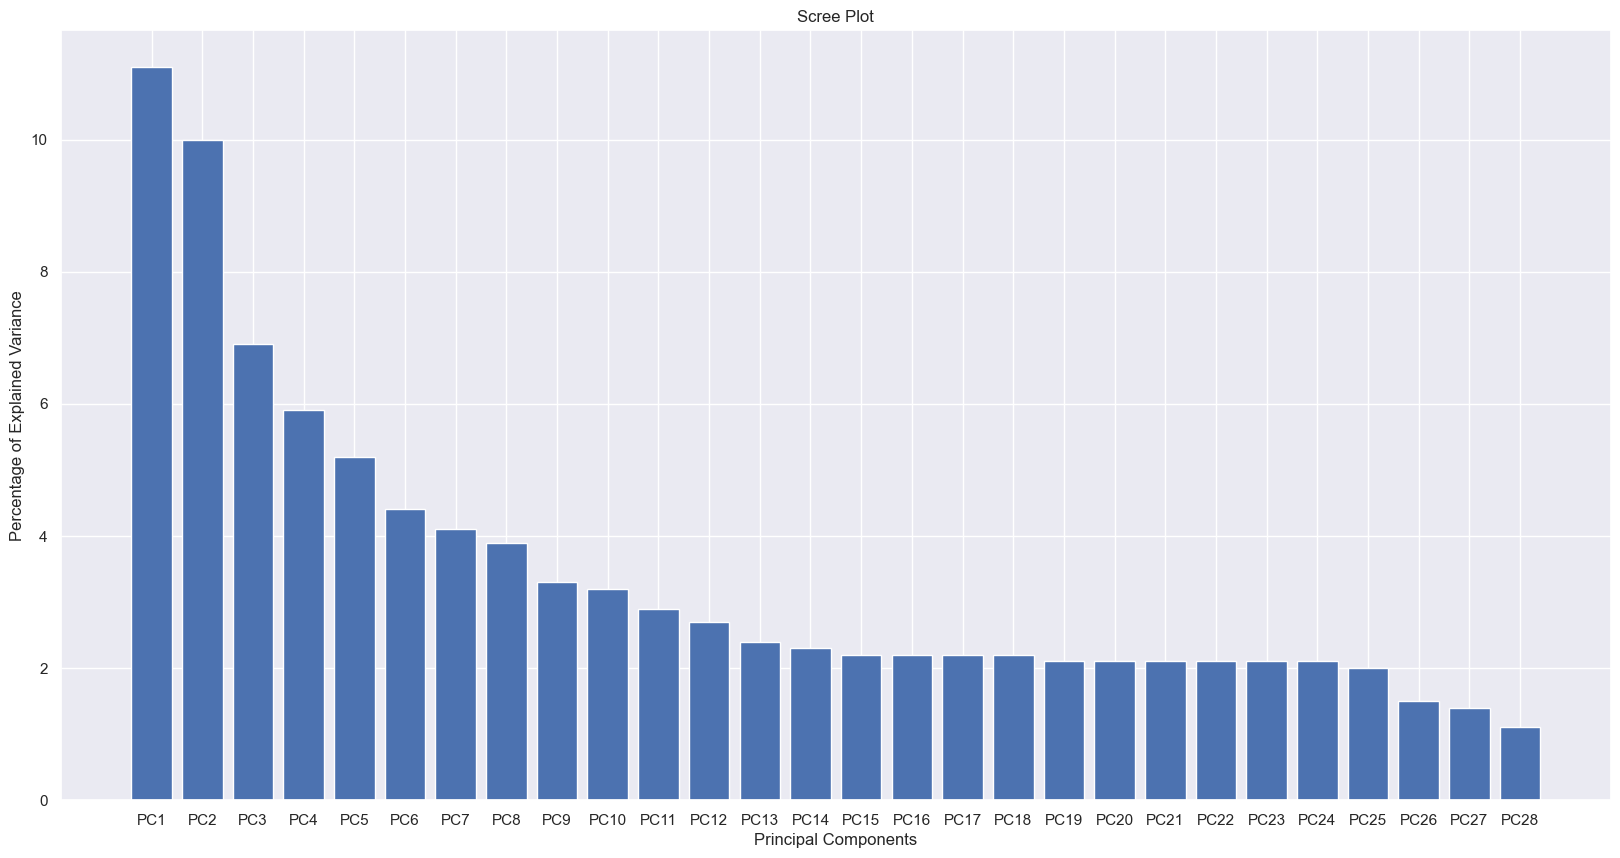

In [208]:
# Scree Bar Plot
labels=['PC'+str(i) for i in range(1, len(per_var)+1)]
plt.bar(x=range(1,len(per_var)+1), height=per_var, tick_label=labels)
plt.ylabel("Percentage of Explained Variance")
plt.xlabel("Principal Components")
plt.title('Scree Plot')
plt.show()


In [209]:
# Create a DataFrame of the PCA data
pca_df = pd.DataFrame(pca_data, columns=[f'PC{i}' for i in range(1, pca_data.shape[1] + 1)])

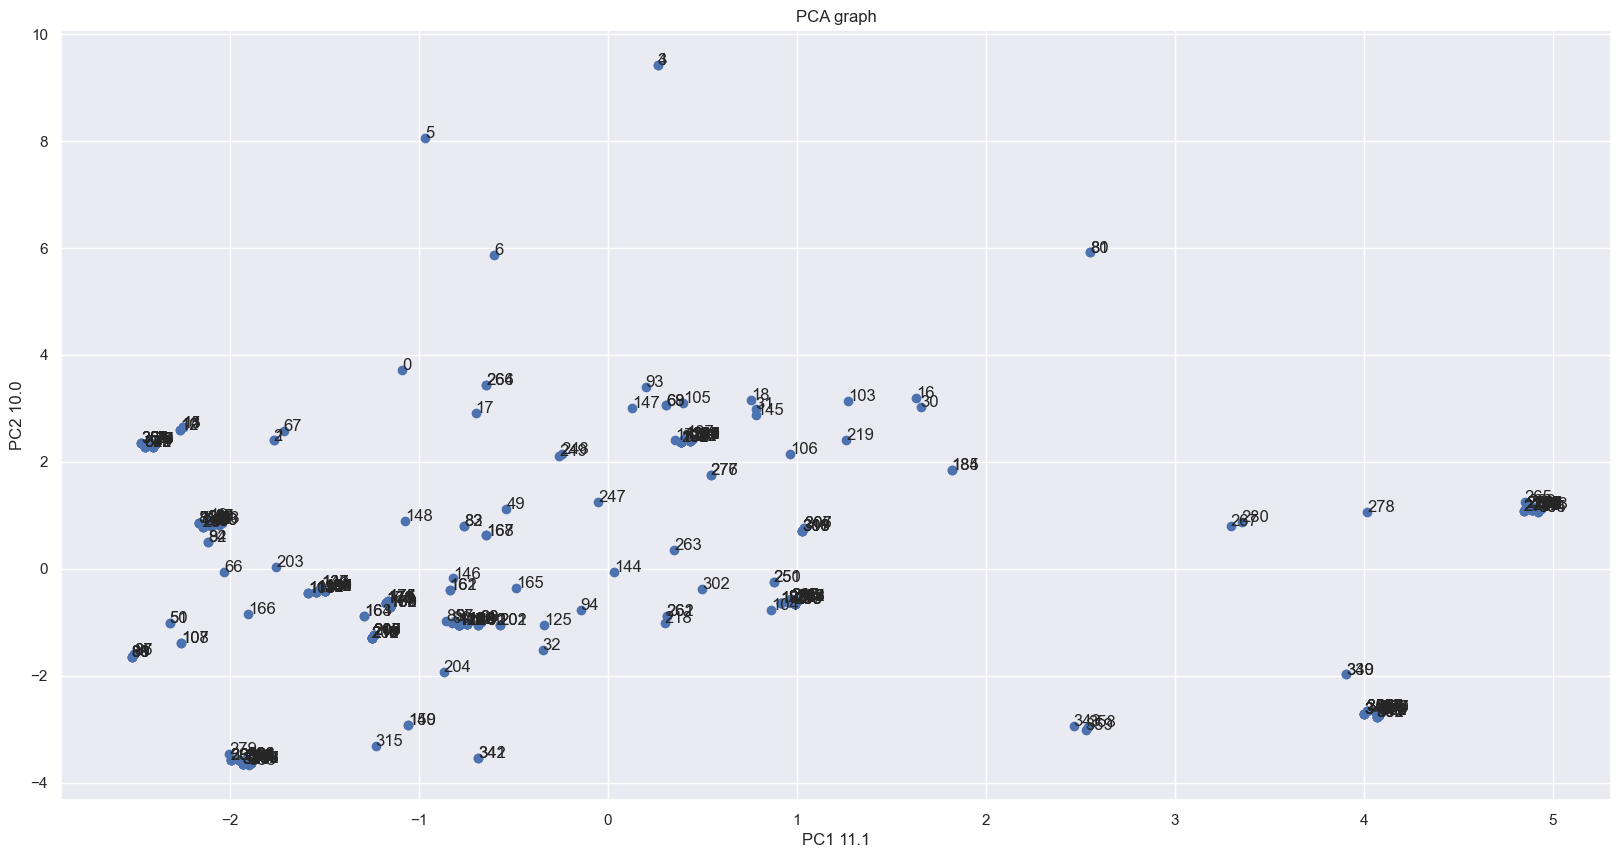

In [210]:
# Scatter plot for first two principal components
plt.scatter(pca_df.PC1, pca_df.PC2)
plt.title("PCA graph")
plt.xlabel(f'PC1 {per_var[0]}')
plt.ylabel(f'PC2 {per_var[1]}')
for sample in pca_df.index:
    plt.annotate(sample, (pca_df.PC1.loc[sample], pca_df.PC2.loc[sample]))
plt.show()

In [211]:
# Loading scores
loading_scores = pd.Series(pca.components_[0], index=final_data.columns)
loading_scores

Age                                0.276554
Sleep Duration                    -0.098898
Quality of Sleep                  -0.050801
Physical Activity Level            0.183310
Stress Level                       0.039023
Heart Rate                         0.120793
Daily Steps                        0.148291
Gender_Male                       -0.245418
Occupation_Doctor                 -0.187162
Occupation_Engineer               -0.146581
Occupation_Lawyer                 -0.087714
Occupation_Manager                 0.003511
Occupation_Nurse                   0.371961
Occupation_Sales Representative    0.003723
Occupation_Salesperson             0.023728
Occupation_Scientist               0.028570
Occupation_Software Engineer      -0.031371
Occupation_Teacher                 0.042115
BMI Category_Normal Weight        -0.035737
BMI Category_Obese                -0.000801
BMI Category_Overweight            0.349644
Blood Pressure_115/78             -0.014881
Blood Pressure_117/76           

In [212]:
# Sort the loading scores
sorted_loading_scores = loading_scores.abs().sort_values(ascending=False)
top_10_features = sorted_loading_scores[0:10].index.values
top_10_features

array(['Blood Pressure_140/95', 'Occupation_Nurse',
       'Sleep Disorder_Sleep Apnea', 'BMI Category_Overweight',
       'Sleep Disorder_None', 'Age', 'Gender_Male',
       'Blood Pressure_125/80', 'Occupation_Doctor',
       'Physical Activity Level'], dtype=object)

In [225]:
# KMeans Clustering
from sklearn.cluster import KMeans

In [226]:
# Fit the KMeans model
kmeans = KMeans(n_clusters=3)
kmeans.fit(pca_df)

c:\Users\liamh\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\liamh\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(


KMeans(n_clusters=3)

In [227]:
# Predict the clusters
clusters = kmeans.predict(pca_df)
clusters

array([0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0,
       1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0,
       0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0,
       0, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 0, 2, 1, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1, 1,

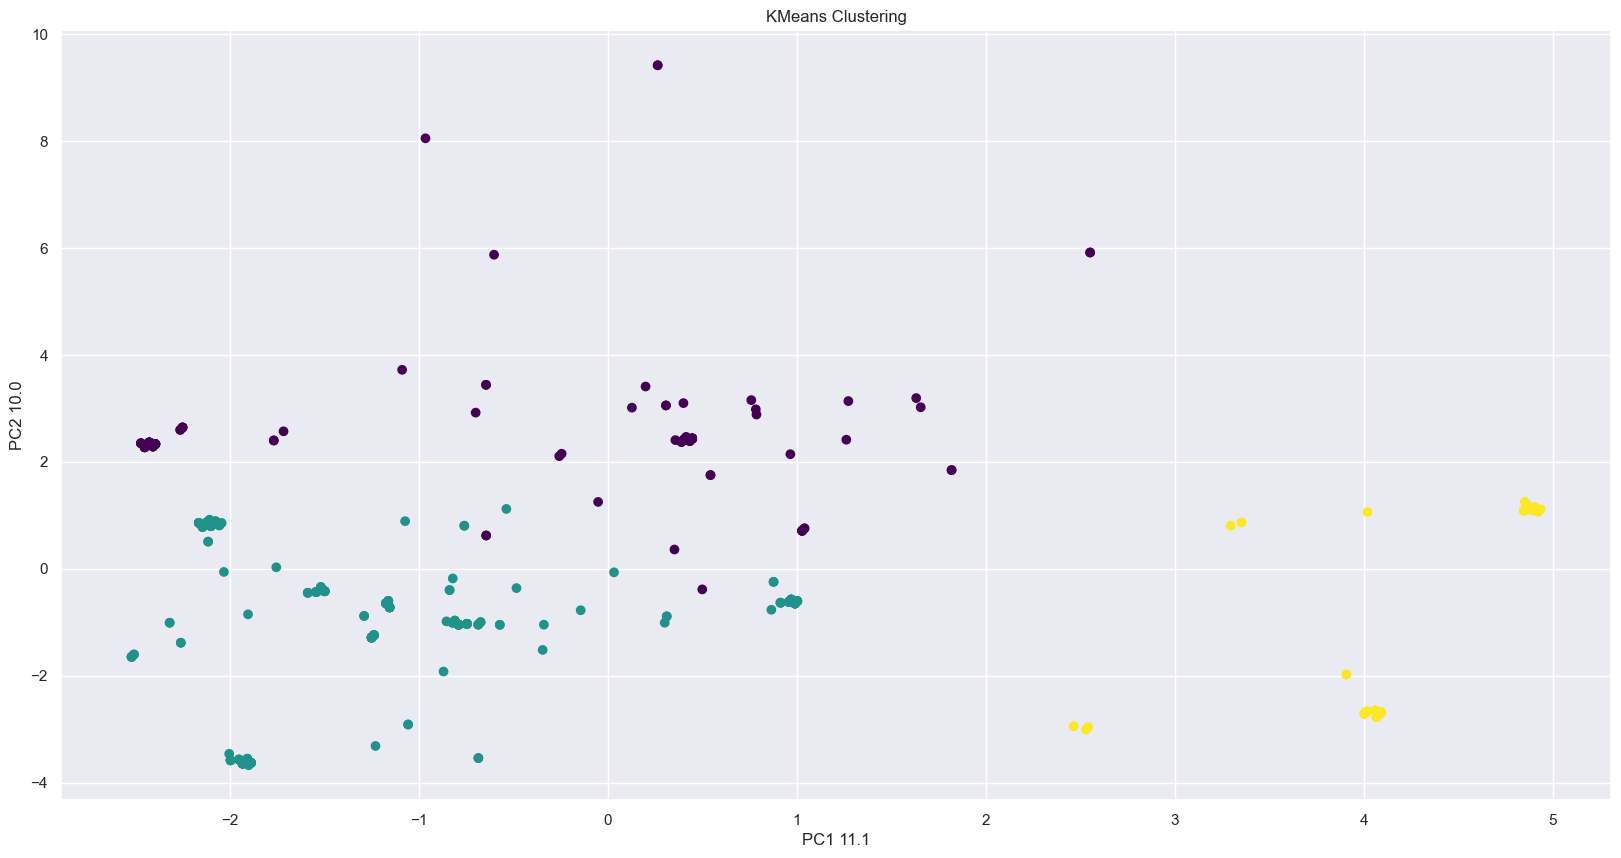

In [228]:
# Plot the clusters
plt.scatter(pca_df.PC1, pca_df.PC2, c=clusters, cmap='viridis')
plt.title("KMeans Clustering")
plt.xlabel(f'PC1 {per_var[0]}')
plt.ylabel(f'PC2 {per_var[1]}')
plt.show()

In [214]:
# PCA Model
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [219]:
# Define features and target
features = pca_df 
target = data['Quality of Sleep']  

In [220]:
# Split the data
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.3, random_state=42)

In [221]:
# Initialise the model
model = LogisticRegression()

In [222]:
# Build a simple logistic regression model
model = LogisticRegression()
model.fit(X_train, y_train)

c:\Users\liamh\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [223]:
# Make predictions and calculate accuracy
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)

In [224]:
print("Model Accuracy:", accuracy)

Model Accuracy: 0.9734513274336283
